In [24]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [25]:
test_list = os.listdir()
test_list = [name for name in test_list if (('.py' not in name) and ('.ipynb' not in name) and ('.json' not in name) and ('small' not in name) and ('tiny' not in name) and ('.md' not in name) and ('.csv' not in name))]
test_list.remove('CUBES')
test_list.remove('.git')
test_list.remove('.gitignore')
test_list = sorted(test_list)
for i,name in enumerate(test_list):
    text = str(i)+' '+ name
    print(text)

0 mati-sim 2-layers
1 mati-sim 3-layers
2 mati-sim my_params 10k g 0, 0.5, 0.9, 1
3 mati-sim my_params 10k-100mln
4 mati-sim org_params 10k-10mln
5 mati-sim veins
6 mc456 my-params light-sources
7 mc456 my_params 10k-100mln
8 mc456 org_params 10k-100mln
9 mc456 rozne g (0.0-1.0 z krokiem 0.1) 100mln
10 mc456 rozne_skóry_z_tabeli (8 rodzajów) 100mln
11 mc456_p my-params 10k-10mln


In [26]:
time_collector = []
for i,data_series_name in enumerate(test_list):
    time_collector.append([data_series_name])

    if i <= 5:
        times = []
        run_name = []
        file_small_dump = 'small_sim_dump.json'
        file_full_dump = 'sim_dump.json'
        sub_test_series = os.listdir(data_series_name)
        sub_test_series = [name for name in sub_test_series if '.png' not in name]
        sub_test_series = [name for name in sub_test_series if '.jpg' not in name]
        sub_test_series = [name for name in sub_test_series if '.jpeg' not in name]
        sub_test_series = [name for name in sub_test_series if '.md' not in name]
        for j,data_point_name in enumerate(sub_test_series):
            results_path = os.path.join(data_series_name, data_point_name, 'resultRecords')
            result_files = os.listdir(results_path)
            if file_small_dump in result_files:
                dumpi_name = file_small_dump
            else:
                dumpi_name = file_full_dump
            dumpi_name = os.path.join(results_path, dumpi_name)
            with open(dumpi_name, 'r') as f:
                sim_dump = json.load(f)
            t = sim_dump['simulation_calculation_time']
            t = float(t)
            times.append(t)
            run_name.append(data_point_name)
        time_collector[i].append(times)
        time_collector[i].append(run_name)

    if i > 5:
        times = []
        run_name = []
        sub_test_series = os.listdir(data_series_name)
        sub_test_series = [name for name in sub_test_series if '.json' not in name]
        for j,data_point_name in enumerate(sub_test_series):
            path_log = os.path.join(data_series_name, data_point_name)
            with open(path_log, 'r') as f:
                sim_log = f.readline()
            sim_log = sim_log.split(' ')[2]
            # time elapsed: 1073.3080 seconds
            t = float(sim_log)
            times.append(t)
            run_name.append(data_point_name)
        time_collector[i].append(times)
        time_collector[i].append(run_name)

print(time_collector)

[['mati-sim 2-layers', [9.886546611785889, 988.9582951068878, 0.9880919456481934, 98.03512787818909, 9912.306844949722], ['1000_photons', '100_000_photons', '100_photons', '10_000_photons', '1_000_000_photons']], ['mati-sim 3-layers', [128.9927453994751, 1021.687760591507, 13.117117881774902, 102.9924259185791, 10031.441426038742], ['1000_fotonow', '100_000_fotonow', '100_fotonow', '10_000_fotonow', '1_000_000']], ['mati-sim my_params 10k g 0, 0.5, 0.9, 1', [508.72013306617737, 453.6809570789337, 176.38519525527954, 61.41500186920166], ['mati-sim_g_0', 'mati-sim_g_0_5', 'mati-sim_g_0_9', 'mati-sim_g_1']], ['mati-sim my_params 10k-100mln', [174.1371350288391, 196204.2739892006, 0.2132875919342041, 17.567716360092163, 19611.488008260727, 1768.5320315361023], ['t_100k_my_params', 't_100mln_my_params', 't_100_my_params', 't_10k_my_params', 't_10mln_my_params', 't_1mln_my_params']], ['mati-sim org_params 10k-10mln', [1249.3648731708527, 129.426011800766, 123736.5491771698, 11969.79120612144

In [27]:
photons = [[1000, 100_000, 100, 10_000, 1_000_000], [1000, 100_000, 100, 10_000, 1_000_000], ['g0', 'g0.5', 'g0.9', 'g1'], [100_000, 100_000_000, 100, 10_000, 10_000_000, 1_000_000]]
photons += [[100_000, 10_000, 10_000_000, 1_000_000], [1000, 100_000, 100, 100, 10_000], ['coll_gauss', 'down', 'foc_gauss', 'isotropic', 'up']]
photons += [[100_000, 100_000_000, 10_000, 10_000_000, 1_000_000], [100_000, 100_000_000, 10_000, 10_000_000, 1_000_000], ['g0','...'], ['g0','...']]
photons += [[100_000, 10_000, 10_000_000, 1_000_000]]
idx_out = [isinstance(l[0], str) for l in photons]
photons = [l for l, cond_out in zip(photons, idx_out) if not cond_out]
time_collector = [l for l, cond_out in zip(time_collector, idx_out) if not cond_out]

for i,data_series in enumerate(time_collector):
    data_series_name = data_series[0]
    print(f'{i} {data_series_name}')

0 mati-sim 2-layers
1 mati-sim 3-layers
2 mati-sim my_params 10k-100mln
3 mati-sim org_params 10k-10mln
4 mati-sim veins
5 mc456 my_params 10k-100mln
6 mc456 org_params 10k-100mln
7 mc456_p my-params 10k-10mln


In [28]:
for i,data_series in enumerate(time_collector):
    if len(data_series) < 4: # time collector has 3 columns, we want to add 4'th
        time_collector[i].append(photons[i])

csv_list = ['seria_testow','test','photon_num','seconds']
csv_text = ','.join(csv_list) + '\n'
for test in time_collector:
    print('=============================')
    print(test[0])
    print('przebiegi')
    print(f'{'test' : >90}{'photon_num' : >20}{'seconds' : >20}')
    for y, x_str, x in zip(test[1], test[2], test[3]):
        print(f'{x_str : >90}{x : >20,}{y : >20,.3}')
        csv_list = [test[0],x_str,x,y]
        csv_list = [str(e) for e in csv_list]
        csv_text += ','.join(csv_list) + '\n'

with open('time_csv.csv', 'w') as f:
    f.write(csv_text)

mati-sim 2-layers
przebiegi
                                                                                      test          photon_num             seconds
                                                                              1000_photons               1,000                9.89
                                                                           100_000_photons             100,000            9.89e+02
                                                                               100_photons                 100               0.988
                                                                            10_000_photons              10,000                98.0
                                                                         1_000_000_photons           1,000,000            9.91e+03
mati-sim 3-layers
przebiegi
                                                                                      test          photon_num             seconds
                           

In [29]:
sorted_time_collector = []
for i,data_series in enumerate(time_collector):
    photon_nums = np.array(data_series[3]) # sort by photon num
    print('photon_nums.shape', photon_nums.shape)
    idx_sorted = np.argsort(photon_nums)

    times_sorted = np.array(data_series[1])[idx_sorted]
    seria_txt_sorted = np.array(data_series[2])[idx_sorted]
    photon_num_sorted = np.array(data_series[3])[idx_sorted]
    max_photon_num = max(photon_num_sorted)
    max_time = max(times_sorted)
    vel = max_photon_num / max_time

    name = data_series[0]
    sorted_data_seria = [name, times_sorted, seria_txt_sorted, photon_num_sorted, vel]
    sorted_time_collector.append(sorted_data_seria)

vels = np.array([data_seria[4] for data_seria in sorted_time_collector])
vels_sorted_idx = np.argsort(vels)

sorted_time_collector = [sorted_time_collector[i] for i in vels_sorted_idx]

photon_nums.shape (5,)
photon_nums.shape (5,)
photon_nums.shape (6,)
photon_nums.shape (4,)
photon_nums.shape (5,)
photon_nums.shape (5,)
photon_nums.shape (5,)
photon_nums.shape (4,)


In [30]:
for i,data_series in enumerate(sorted_time_collector):
    print(f'{i} {data_series[0]}')
    print(f'{data_series[1]}')
    print(f'{data_series[2]}')
    print(f'{data_series[3]}')
    print(f'{data_series[4]} fotonów na sekundę')
    print()
    print()

0 mati-sim veins
[   31.46230173    18.69247246   170.05679941  1714.2700305
 15507.92307973]
['100_fotonow_propEnvVec' '100_fotonów' '1000_fotonów' '10_000_fotonów'
 '100_000_fotonów']
[   100    100   1000  10000 100000]
6.448316740151575 fotonów na sekundę


1 mati-sim org_params 10k-10mln
[   129.4260118    1249.36487317  11969.79120612 123736.54917717]
['t_10k_original_params' 't_100k_original_params' 't_1mln_original_params'
 't_10mln_original_params']
[   10000   100000  1000000 10000000]
80.81686507744524 fotonów na sekundę


2 mati-sim 3-layers
[   13.11711788   128.9927454    102.99242592  1021.68776059
 10031.44142604]
['100_fotonow' '1000_fotonow' '10_000_fotonow' '100_000_fotonow'
 '1_000_000']
[    100    1000   10000  100000 1000000]
99.68657120444198 fotonów na sekundę


3 mati-sim 2-layers
[9.88091946e-01 9.88654661e+00 9.80351279e+01 9.88958295e+02
 9.91230684e+03]
['100_photons' '1000_photons' '10_000_photons' '100_000_photons'
 '1_000_000_photons']
[    100    1000 

In [31]:
sorted_ids = [4,3,0,1,7,2,6,5]
sorted_time_collector2 = [sorted_time_collector[i] for i in sorted_ids]
sorted_time_collector2 = sorted_time_collector

 6 fotonów/sekundę - Python - własna implementacja - model żyły
 81 fotonów/sekundę - Python - własna implementacja - parametry (II)
 100 fotonów/sekundę - Python - własna implementacja - modele dwuwarstwowy i trzywarstwowy
 101 fotonów/sekundę - Python - mc321 - parametry (I)
 455 fotonów/sekundę - Python - własna implementacja - parametry (I)
 510 fotonów/sekundę - C - mc321 - parametry (II)
 9471 fotonów/sekundę - C - mc321 - parametry (I)


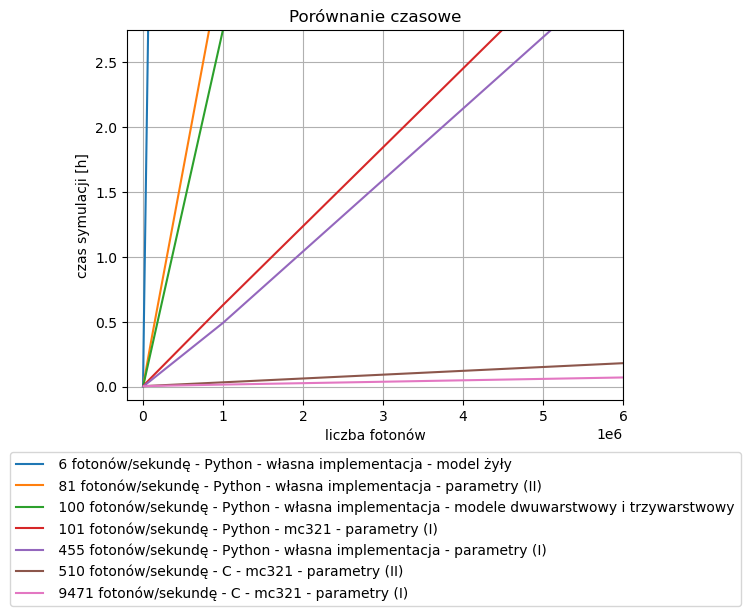

In [45]:
skip = [0,1,4]
skip = [0,1]
skip = [0]
skip = [2]

for i,data_series in enumerate(sorted_time_collector2):

    if i in skip:
        continue

    [photon_num, time_arr] = [data_series[3], data_series[1]]
    x = photon_num
    y = time_arr / 60 / 60
    plt.plot(x, y)
    # plt.scatter(x, y, marker='x')

names3 = [
    f'{'Python': >10}{'własna implementacja': >25}{'model żyły':>42}',
    f'{'Python': >10}{'własna implementacja': >25}{'parametry (II)':>42}',
    f'{'Python': >10}{'własna implementacja': >25}{'modele dwuwarstwowy i trzywarstwowy':>42}',
    f'{'Python': >10}{'mc321': >25}{'parametry (I)':>42}',
    f'{'Python': >10}{'własna implementacja' :>25}{'parametry (I)':>42}',
    f'{'C': >10}{'mc321': >25}{'parametry (II)':>42}',
    f'{'C': >10}{'mc321': >25}{'parametry (I)':>42}'
    ]
names34 = [
    f'{'Python'} - {'własna implementacja'} - {'model żyły'}',
    f'{'Python'} - {'własna implementacja'} - {'parametry (II)'}',
    f'{'Python'} - {'własna implementacja'} - {'modele dwuwarstwowy i trzywarstwowy'}',
    f'{'Python'} - {'mc321'} - {'parametry (I)'}',
    f'{'Python'} - {'własna implementacja'} - {'parametry (I)'}',
    f'{'C'} - {'mc321'} - {'parametry (II)'}',
    f'{'C'} - {'mc321'} - {'parametry (I)'}'
    ]
names33 = [f'{data_series[4]: >8.0f}{'fotonów/sekundę': >17}{nam}' for nam, data_series in zip(names3, sorted_time_collector2)]
names344 = [f'{data_series[4]: .0f} {'fotonów/sekundę'} - {nam}' for nam, data_series in zip(names34, sorted_time_collector2)]
for nm in names344:
    print(nm)
names4 = [
    'A.',
    'B.',
    'C.',
    'D.',
    'E.',
    'F.',
    'G.'
    ]
names = [f'{data_series[4]:.0f} fotonów/sekundę ' + data_series[0] for data_series in sorted_time_collector2]
names11 = [n for i,n in enumerate(names) if i not in skip]
# plt.legend(names3, loc='center left', bbox_to_anchor=(1, 0.5))
# plt.legend(names3)
plt.legend(names344, loc='center left', bbox_to_anchor=(-0.25, -0.35))
# plt.xlim((0,10**3))
# plt.xscale('log')
plt.grid()
plt.title('Porównanie czasowe')
plt.xlabel('liczba fotonów')
plt.ylabel('czas symulacji [h]')
plt.xlim(-2e5,6e6)
plt.ylim(-0.1,2.75)
plt.show()

In [36]:
# skip = [0,1,4]
# skip = [0,1]
# skip = [0]
# skip = [2]

# for i,data_series in enumerate(sorted_time_collector2):

#     if i in skip:
#         continue

#     [photon_num, time_arr] = [data_series[3], data_series[1]]
#     x = photon_num
#     y = time_arr / 60 / 60
#     plt.plot(x, y)
#     # plt.scatter(x, y, marker='x')

# names3 = [
#     f'{'Python': >10}{'własna implementacja': >25}{'model żyły':>42}',
#     f'{'Python': >10}{'własna implementacja': >25}{'parametry (II)':>42}',
#     f'{'Python': >10}{'własna implementacja': >25}{'modele dwuwarstwowy i trzywarstwowy':>42}',
#     f'{'Python': >10}{'mc321': >25}{'parametry (I)':>42}',
#     f'{'Python': >10}{'własna implementacja' :>25}{'parametry (I)':>42}',
#     f'{'C': >10}{'mc321': >25}{'parametry (II)':>42}',
#     f'{'C': >10}{'mc321': >25}{'parametry (I)':>42}'
#     ]
# names34 = [
#     f'{'Python'}, {'własna implementacja'}, {'model żyły'}',
#     f'{'Python'}, {'własna implementacja'}, {'parametry (II)'}',
#     f'{'Python'}, {'własna implementacja'}, {'modele dwuwarstwowy i trzywarstwowy'}',
#     f'{'Python'}, {'mc321'}, {'parametry (I)'}',
#     f'{'Python'}, {'własna implementacja'}, {'parametry (I)'}',
#     f'{'C'}, {'mc321'}, {'parametry (II)'}',
#     f'{'C'}, {'mc321'}, {'parametry (I)'}'
#     ]
# names33 = [f'{data_series[4]: >8.0f}{'fotonów/sekundę': >17}{nam}' for nam, data_series in zip(names3, sorted_time_collector2)]
# names344 = [f'{data_series[4]: .0f} {'fotonów/sekundę'}, {nam}' for nam, data_series in zip(names34, sorted_time_collector2)]
# for nm in names344:
#     print(nm)
# names4 = [
#     'A.',
#     'B.',
#     'C.',
#     'D.',
#     'E.',
#     'F.',
#     'G.'
#     ]
# names = [f'{data_series[4]:.0f} fotonów/sekundę ' + data_series[0] for data_series in sorted_time_collector2]
# names11 = [n for i,n in enumerate(names) if i not in skip]
# # plt.legend(names3, loc='center left', bbox_to_anchor=(1, 0.5))
# # plt.legend(names3)
# plt.legend(names344, loc='center left', bbox_to_anchor=(-0.1, -0.35))
# # plt.xlim((0,10**3))
# # plt.xscale('log')
# plt.grid()
# plt.title('Porównanie czasowe')
# plt.xlabel('Liczba fotonów')
# plt.ylabel('Czas symulacji [h]')
# plt.xlim(-2e5,6e6)
# plt.ylim(-0.1,2.75)
# plt.show()

In [34]:
names = [time_collector[i][0] for i in range(len(xy_list))]
skip = [0,1,4]
names2 = [n for n,i in zip(names, range(len(names))) if i in skip]

for i in range(len(xy_list)):

    if i not in skip:
        continue

    [photon_num, time_arr] = xy_list[i]
    x = photon_num
    y = time_arr / 60 / 60
    plt.plot(x, y)
    # plt.scatter(x, y, marker='x')

plt.legend(names2)
# plt.xlim((0,10**3))
# plt.xscale('log')
plt.grid()
plt.show()

NameError: name 'xy_list' is not defined

In [146]:
mc456 my
10 mln
time elapsed: 410.2528 seconds

SyntaxError: invalid syntax (1379041795.py, line 1)

In [ ]:
mc456_p my 
10 mln
time elapsed: 21958.1426 seconds


In [2]:
c = 410.2528
pyth = 21958.1426

pyth/c

53.52344359380363

In [3]:
(c-pyth)/pyth

-0.9813165982445164